In [183]:
#Victor Zhang Proj 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

class LinearReg:
    #linear reg equ. 3.50, 3.51

    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        self.mean = None
        self.prec = None

    #update parameter
    def fit(self, X, t):

        if self.mean is not None:
            mean_prev = self.mean
            prec_prev = self.prec
        else:
            mean_prev = np.zeros(np.size(X, 1))
            prec_prev = self.alpha * np.eye(np.size(X, 1))


        self.prec = prec_prev + self.beta * X.T @ X
        self.varr = np.linalg.inv(self.prec)
        mean = self.varr@(prec_prev@mean_prev+self.beta * X.T @ t)
        self.mean = mean

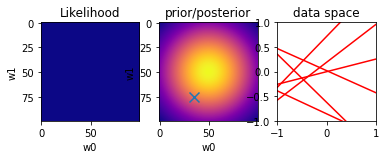

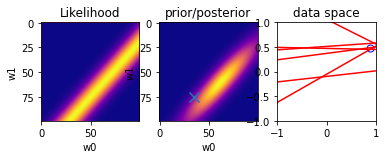

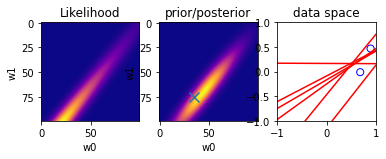

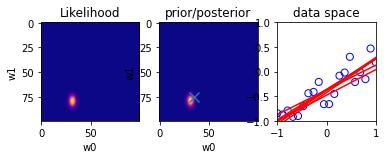

In [185]:
n_iters = 20
# generate data space & shuffle
grid_res = 100
x1 = np.linspace(-1,1,n_iters)
np.random.shuffle(x1)
# generate target t as described in pg.154
y = 0.5*x1 - 0.3
g_noise = np.random.normal(0,0.2,n_iters)
t = y + g_noise
x2 = [np.ones(np.shape(x1)),x1]
x2 = np.transpose(x2)

x = np.linspace(-1, 1, n_iters)
X = [np.ones(np.shape(x)),x]
X = np.transpose(X)

#parameter space
w0, w1 = np.meshgrid(np.linspace(-1, 1, grid_res),np.linspace(-1, 1, grid_res))
w = np.array([w0, w1]).transpose(1, 2, 0)
LR = LinearReg(alpha=2., beta=25.)
llh = np.ones(np.shape(w0))
for begin,end in [[0, 0], [0, 1], [1, 2], [2, 20]]: #4 rows
    LR.fit(x2[begin: end], t[begin: end])

    #generating likelihood, build upon previous likelihood
    plt.subplot(1, 3, 1)
    for ind in range(begin, end):
        mean_vec = w0+w1*x1[ind]
        for i in range(1,grid_res):
            for j in range(1,grid_res):
                llh[i][j] *= multivariate_normal.pdf(t[ind], mean=mean_vec[i][j], cov=1/25)
    plt.imshow(llh,cmap='plasma')
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.title("Likelihood")

    #plot prior/posterior
    plt.subplot(1, 3, 2)
    plt.scatter((-0.3+1)*grid_res/2, (0.5+1)*grid_res/2, s=100, marker="x")
    plt.imshow(multivariate_normal.pdf(w, mean=LR.mean, cov=LR.varr),cmap='plasma')
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.title("prior/posterior")

    #plot data space
    plt.subplot(1, 3, 3)
    plt.scatter(x1[:end], t[:end], s=50, facecolor="none", edgecolor="blue")
    plt.plot(x, X @ np.random.multivariate_normal(LR.mean, LR.varr, size=6).T, c="red")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title("data space")
    plt.gca().set_aspect('equal')
    plt.show()

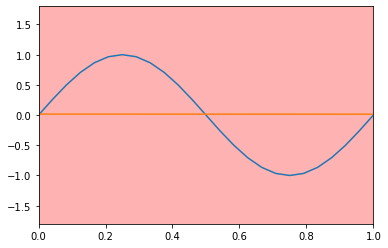

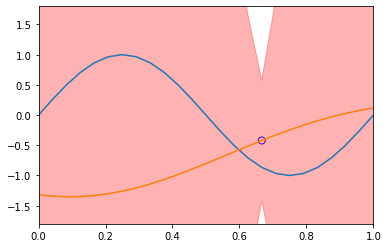

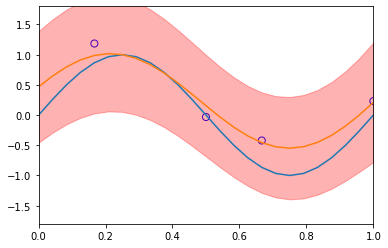

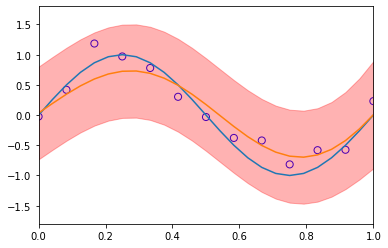

In [186]:
n_iters = 25

x1 = np.linspace(-1,1,n_iters)
np.random.shuffle(x1)
t = np.sin(2 * np.pi * x1)
g_noise = np.random.normal(0,0.2,n_iters)
t = t + g_noise
x = np.linspace(0, 1, n_iters)
y_test = np.sin(2 * np.pi * x)

#generate w/ gaussian basis, 9 gaussians
m0 = np.linspace(0,1,9)
x2 = [np.ones(np.shape(x1))]
x_test2 = [np.ones(np.shape(x))]
for m in m0:
    x2.append(multivariate_normal.pdf(x1,m,0.2))
    x_test2.append(multivariate_normal.pdf(x,m,0.2))
x2 = np.transpose(x2)
x_test2 = np.transpose(x_test2)


LR = LinearReg(alpha=1e-3, beta=2.)

for begin, end in [[0, 1], [1, 3], [2, 7], [7, 25]]:
    LR.fit(x2[begin: end], t[begin: end])
    y = x_test2 @ LR.mean
    std = np.sqrt(1 / LR.beta + np.sum(x_test2 @ LR.varr * x_test2,axis=1))
    plt.scatter(x1[:end], t[:end], s=50, facecolor="none", edgecolor="blue")
    plt.fill_between(x, y - std, y + std, color="red", alpha=0.3)#confidence
    plt.plot(x, y_test)#group truth
    plt.plot(x, y)#approx
    plt.ylim(-1.8, 1.8)
    plt.xlim(0, 1)
    plt.show()